<a href="https://colab.research.google.com/github/GoPackers/NU422/blob/master/ConnellyWk2HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bank Marketing Study - Evaluating Classifcation Model
Terrence Connelly, MSDS422

**Management Problem & Summary:  **We are advising the bank about machine learning methods to guide telephone marketing campaigns. We look at two modeling methods.   And, given the results of our research, we seek to determine which group of banking clients appears to be the best target for direct marketing efforts.  

# INGEST

In [1]:
import pandas as pd  # data frame operations  
import numpy as np  # arrays and math functions
import matplotlib.pyplot as plt  # static plotting
%matplotlib inline

import seaborn as sns  # pretty plotting, including heat map
plt.style.use('fivethirtyeight')

# correlation heat map setup for seaborn
def corr_chart(df_corr):
    corr=df_corr.corr()
    #screen top half to get a triangle
    top = np.zeros_like(corr, dtype=np.bool)
    top[np.triu_indices_from(top)] = True
    fig=plt.figure()
    fig, ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr, mask=top, cmap='coolwarm', 
        center = 0, square=True, 
        linewidths=.5, cbar_kws={'shrink':.5}, 
        annot = True, annot_kws={'size': 9}, fmt = '.3f')           
    plt.xticks(rotation=45) # rotate variable labels on columns (x axis)
    plt.yticks(rotation=0) # use horizontal variable labels on rows (y axis)
    plt.title('Correlation Heat Map')   
    plt.savefig('plot-corr-map.png', 
        bbox_inches = 'tight', dpi=None, facecolor='w', edgecolor='b', 
        orientation='portrait', papertype=None, format=None, 
        transparent=True, pad_inches=0.25, frameon=None)      

np.set_printoptions(precision=3)


from sklearn.preprocessing import OrdinalEncoder

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# BernoulliNB is designed for binary/boolean features
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import roc_auc_score   
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# import base packages into the namespace for this program
import numpy as np
import pandas as pd

import os

PROJECT_ROOT_DIR = ""
CHAPTER_ID = ""

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

print("All Packages and a Correlation Chart function loaded.  WARNING - this was created in April, 2019 and warnings were supressed.")

All Packages and a Correlation Chart function loaded.  WARNING - this was created in April, 2019 and warnings were supressed.


In [2]:
bank = pd.read_csv('https://github.com/GoPackers/NU422/raw/master/bank.csv', sep = ';')  
# examine the shape of original input data
print(bank.shape)
print(bank.dropna().shape)


(4521, 17)
(4521, 17)


In [3]:
list(bank.columns.values)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response']

## Exploratory Data Analysis

:  We use all banking client observations with complete data for these study variables.  There were 4,52 clients observed, and factors to consider included: 'age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', and 'response' .  We focused only on the binary factors:  default yes/no, if the customer had a home loan, and if they had a personal loan.   We employed two classification methods: (1) logistic regression and Naïve Bayes and then evaluated these within a cross-validation design, using the area under the receiver operating characteristic (ROC) curve as an index of classification performance. Python scikit-learn was employed for this analysis.  Finally, in testing we looked at each binary variable individually and averaged versus the response rate.   


In [0]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


To look at data I converted a few columns to 1 and 0 to look at it

In [0]:
test = bank.copy()
convert_to_binary = {'no' : 0, 'yes' : 1}
test['default'] = bank['default'].map(convert_to_binary)
test['housing'] = bank['housing'].map(convert_to_binary)
test['loan'] = bank['loan'].map(convert_to_binary)
test['response'] = bank['response'].map(convert_to_binary)
test = test[['default', 'housing', 'loan', 'response']]

In [0]:
NoHome = test[test['housing'] == 0].sum()
NoLoan = test[test['loan'] == 0].sum()

Text(0.5, 1.0, 'Response Rate By Loan History')

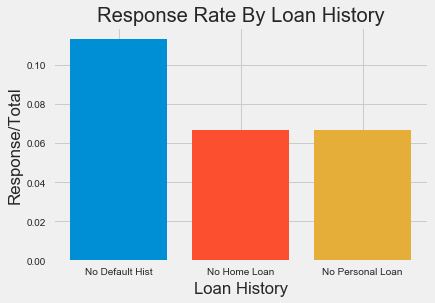

In [0]:
fig, ax = plt.subplots()
f1 = plt.bar('No Default Hist', NoDef['response']/test['response'].count())
f2 = plt.bar('No Home Loan', NoHome['response']/test['response'].count())
f3 = plt.bar('No Personal Loan', NoHome['response']/test['response'].count())

plt.xlabel('Loan History')
plt.ylabel('Response/Total')
plt.title('Response Rate By Loan History')


Now make matrix using original data

In [0]:
convert_to_binary = {'no' : 0, 'yes' : 1}
bank['default'] = bank['default'].map(convert_to_binary)
bank['housing'] = bank['housing'].map(convert_to_binary)
bank['loan'] = bank['loan'].map(convert_to_binary)
bank['response'] = bank['response'].map(convert_to_binary)
bank['average'] = bank[['default', 'housing', 'loan']].mean(axis = 1)

In [0]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,average
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0,0.000000
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0,0.666667
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0,0.333333
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0,0.666667
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0,0.333333


In [0]:

##### mapping function to convert text no/yes to integer 0/1
convert_to_binary = {'no' : 0, 'yes' : 1}

##### define binary variable for having credit in default
default = bank['default'].map(convert_to_binary)

##### define binary variable for having a mortgage or housing loan
housing = bank['housing'].map(convert_to_binary)

##### define binary variable for having a personal loan
loan = bank['loan'].map(convert_to_binary)

##### define response variable to use in the model
response = bank['response'].map(convert_to_binary)

In [0]:
# gather three explanatory variables and response into a numpy array 
# here we use .T to obtain the transpose for the structure we want

#put this back in if you want to use all 3

model_data_ALL = np.array([np.array(default), np.array(housing), np.array(loan), 
    np.array(response)]).T

In [0]:
avg = bank['average']
resp = bank['response']
model_data = np.array([avg, resp]).T

In [0]:
model_data

array([[0.   , 0.   ],
       [0.667, 0.   ],
       [0.333, 0.   ],
       ...,
       [0.   , 0.   ],
       [0.   , 0.   ],
       [0.667, 0.   ]])

In [0]:
print(model_data.shape)

(4521, 2)


Assign the Data

In [0]:
X = model_data[:,0].reshape(-1,1)

y = model_data[:,1].reshape(-1,1)

In [0]:
print('Sum of X and y: ' + str(sum(X).round(2)) +'   ' + str(sum(y)))

Sum of X and y: [1108.67]   [521.]


Split the Data

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(3616, 1) (3616, 1)
(905, 1) (905, 1)


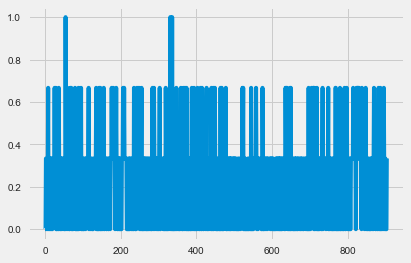

In [0]:
plt.plot(X_test)

### Fit the linear model

In [0]:
lm = linear_model.LogisticRegression()
model = lm.fit(X_train, y_train)
predictions = lm.predict(X_test)
model.score(X_test, y_test)


0.881767955801105

In [0]:
lm2 = linear_model.LinearRegression()
model2 = lm2.fit(X_train, y_train)
predictions2 = lm2.predict(X_test)
model2.score(X_test, y_test)

0.010298064636785398

In [0]:
lm3 = BernoulliNB(alpha=1.0, binarize=0.5, fit_prior=False)
model3 = lm3.fit(X_train, y_train)
predictions3 = lm3.predict(X_test)
model3.score(X_test, y_test)

0.1878453038674033

Text(0, 0.5, 'Predicted Response')

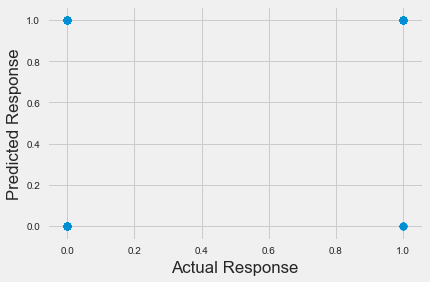

In [0]:
plt.scatter(y_test, predictions3)
plt.xlabel("Actual Response")
plt.ylabel("Predicted Response")

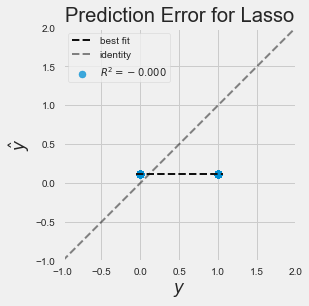

In [0]:
from yellowbrick.regressor import PredictionError
from sklearn.linear_model import Lasso

lasso = Lasso()
visualizer = PredictionError(lasso)
visualizer.fit(X_train, y_train) # Fit the training data to the visualizer
visualizer.score(X_test, y_test) # Evaluate the model on the test data
g = visualizer.poof()            # Draw/show/poof the data

In [0]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [0]:
scores1 = cross_val_score(model, X, y, cv=6)
scores1

array([0.885, 0.885, 0.885, 0.885, 0.884, 0.886])

In [0]:
scores2 = cross_val_score(model2, X, y, cv=6)
scores2

array([0.017, 0.022, 0.01 , 0.009, 0.02 , 0.003])

In [0]:
scores3 = cross_val_score(model, X, y, cv=6)
scores3

array([0.885, 0.885, 0.885, 0.885, 0.884, 0.886])

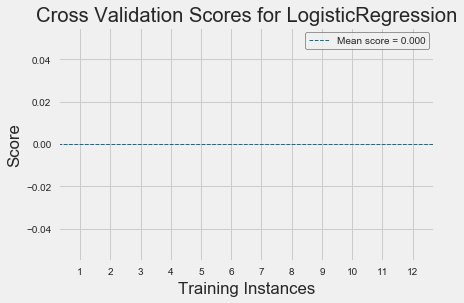

In [0]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from yellowbrick.model_selection import CVScores

# Create a new figure and axes
_, ax = plt.subplots()
cv = KFold(12)

oz = CVScores(
    linear_model.LogisticRegression(), ax=ax, cv=cv, scoring='f1'
)

oz.fit(X, y)
oz.poof()

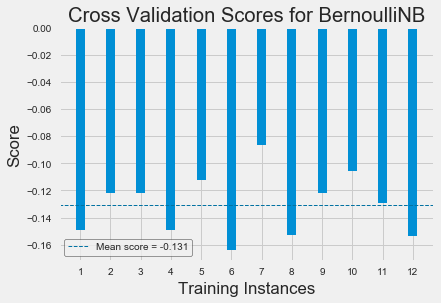

In [0]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from yellowbrick.model_selection import CVScores

# Create a new figure and axes
_, ax = plt.subplots()
cv = KFold(12)

oz = CVScores(
    BernoulliNB(), ax=ax, cv=cv, scoring='r2'
)

oz.fit(X, y)
oz.poof()

#### Testing Precision Recall and ROC AUC

In [0]:
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import SGDClassifier



sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)

y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv=3,
                             method="decision_function")
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

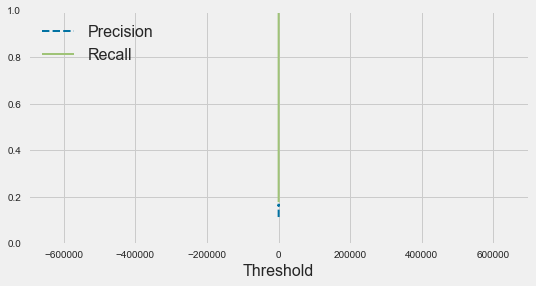

In [0]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

plt.figure(figsize=(8, 4))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([-700000, 700000])
#save_fig("precision_recall_vs_threshold_plot")
plt.show()

Saving figure precision_vs_recall_plot


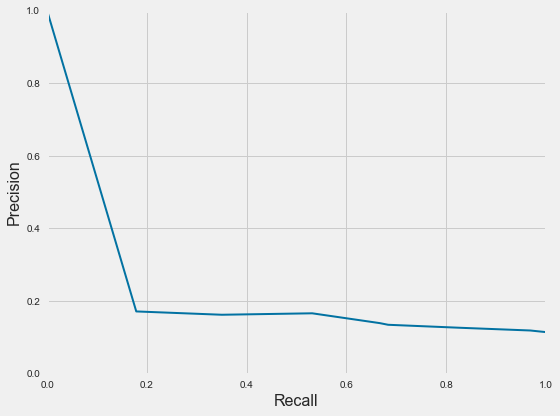

In [0]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
save_fig("precision_vs_recall_plot")
plt.show()

In [0]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train, y_scores)

Saving figure roc_curve_plot


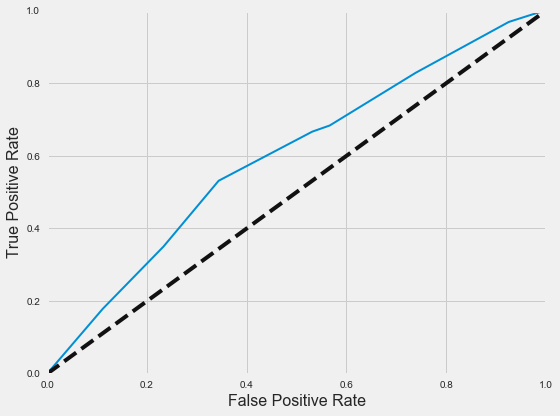

In [0]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
save_fig("roc_curve_plot")
plt.show()

#### Last I looked at re-doing this with loops to study data, but time didn't permit

In [0]:

# list of names for classifier models
classifier_names = ["Logistic_Regression", "Naive_Bayes"]

# list of classifiers
classifiers = [LogisticRegression(), BernoulliNB(alpha=1.0, binarize=0.5, 
                           class_prior = [0.5, 0.5], fit_prior=False)]

In [0]:
classifiers

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
           intercept_scaling=1, max_iter=100, multi_class='warn',
           n_jobs=None, penalty='l2', random_state=None, solver='warn',
           tol=0.0001, verbose=0, warm_start=False),
 BernoulliNB(alpha=1.0, binarize=0.5, class_prior=[0.5, 0.5], fit_prior=False)]

In [0]:
N_FOLDS = 10

# set up numpy array for storing results
crossvalidation_results = np.zeros((N_FOLDS, len(classifier_names)))

# kf, object,  model selection kfold split set up
kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)

#--check the splitting process by looking at fold observation counts--
# fold count initialized to zero
index_for_fold = 0 

In [0]:
for train_index, test_index in KFold.split(model_data):
    print('\nFold index:', index_for_fold,
          '------------------------------------------')
    # 0:model_data.shape[1]-1 slices for explanatory variables,
    X_train = model_data[train_index, 0:model_data.shape[1]-1]
    X_test = model_data[test_index, 0:model_data.shape[1]-1]
    
    # model_data.shape[1]-1 is the index for the response variable
    y_train = model_data[train_index, model_data.shape[1]-1]
    y_test = model_data[test_index, model_data.shape[1]-1]
    
    # prints structure of data after split for x, y 
    print('\nShape of input data for this fold:',
          '\nData Set: (Observations, Variables)')
    print('X_train:', X_train.shape)
    print('X_test:',X_test.shape)
    print('y_train:', y_train.shape)
    print('y_test:',y_test.shape)
    
    # index for method initialized to zero
    index_for_method = 0
    
    # loops through classifiers
    # fits the respective model
    # performs predictions
    for name, clf in zip(classifier_names, classifiers):
        print('\nClassifier evaluation for:', name)
        print('  Scikit Learn method:', clf)
        
         # fit current classifier model using train data set
        clf.fit(X_train, y_train) 
        
        # calculate predictions to evaluate, using test set for this fold
        y_test_predict = clf.predict_proba(X_test)
        
        # calculates ROC AUC score, stores results in cv_results
        fold_method_result = roc_auc_score(y_test, y_test_predict[:,1]) 
        print('Area under ROC curve:', fold_method_result)
        crossvalidation_results[index_for_fold, index_for_method] = fold_method_result
        
        
        # adds one to the index, next loop will be the next classifier
        index_for_method += 1
        
    # adds one to the index, next loop will be the next split in fold    
    index_for_fold += 1

TypeError: split() missing 1 required positional argument: 'X'

In [0]:
X_train = model_data[train_index, 0:model_data.shape[1]-1]
X_test = model_data[test_index, 0:model_data.shape[1]-1]

NameError: name 'train_index' is not defined

#Conclusion & Management Recommendations:  

---
Naïve Bayes and Logistic Regression are equally useful as models.



---


However, the Machine Learning algorithms deployed fail to predict results that are enough better than random to warrant a clear business marketing decision. 

---



It appears that more work can be done on analyzing the history of default characteristics and those borrowers’ tendency to respond to marketing campaigns.  


---


